In [2]:
#importing all required libraries
import glob
import os
import xml.etree.ElementTree as ET
!pip install keras-preprocessing
from keras_preprocessing import image
from PIL import Image
from pathlib import Path
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00


In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
#input dog images
def dog_images(dog_breed):
    print(dog_breed)
    path = f'/content/drive/MyDrive/MyImages/{dog_breed}/*'
    return glob.glob(path)
cropped = "./content/drive/MyDrive/ResizedImages/"
dog_images_list = []
dog_breeds = {
    0: 'n02089078-black-and-tan_coonhound',
    1: 'n02091831-Saluki',
    2: 'n02092002-Scottish_deerhound',
    3: 'n02095314-wire-haired_fox_terrier'
}
for i in range(4):
    dog_images_list+=dog_images(dog_breeds[i])

n02089078-black-and-tan_coonhound
n02091831-Saluki
n02092002-Scottish_deerhound
n02095314-wire-haired_fox_terrier


In [5]:
#input annotations
def annotations(dog_breed):
    print(dog_breed)
    path = os.path.join('/content/drive/MyDrive/MyAnnotations', dog_breed, '*')
    return glob.glob(path)

annotations_list = []

for i in range(4):
    annotations_list+=annotations(dog_breeds[i])

n02089078-black-and-tan_coonhound
n02091831-Saluki
n02092002-Scottish_deerhound
n02095314-wire-haired_fox_terrier


In [6]:
# Normalize and convert '/' as the path separator for annotations_list
annotations_list = [os.path.normpath(i).replace(os.sep, '/') for i in annotations_list]
# Normalize and convert '/' as the path separator for dog_images_list
dog_images_list = [os.path.normpath(i).replace(os.sep, '/') for i in dog_images_list]

In [7]:
len(dog_images_list)

748

In [8]:
#image cropping using the code snippets provided

class crop_resize:
    def __init__(self):
        pass
    def get_bounding_boxes(self,annot):
        xml = annot
        tree = ET.parse(xml)
        root = tree.getroot()
        objects = root.findall('object')
        bbox = []
        for o in objects:
            bndbox = o.find('bndbox')
            xmin = int(bndbox.find('xmin').text)
            ymin = int(bndbox.find('ymin').text)
            xmax = int(bndbox.find('xmax').text)
            ymax = int(bndbox.find('ymax').text)
            bbox.append((xmin,ymin,xmax,ymax))
        return bbox

    def get_image(self,annot):
        img_path = '/content/drive/MyDrive/MyImages/'
        file = annot.split('/')
        img_filename = img_path + file[-2]+'/'+file[-1]+'.jpg'
        return img_filename

    def image_save(self):
        for i in range(len(dog_images_list)):

            bbox = self.get_bounding_boxes(annotations_list[i])
            dog = self.get_image(annotations_list[i])
            im = Image.open(dog)
            for j in range(len(bbox)):
                im2 = im.crop(bbox[j])
                im2 = im2.resize((128,128), Image.ANTIALIAS)
                new_path = dog.replace('/content/drive/MyDrive/MyImages/','/content/drive/MyDrive/ResizedImages/')
                new_path = new_path.replace('.jpg','-' + str(j) + '.jpg')
                im2=im2.convert('RGB')
                head, tail = os.path.split(new_path)
                Path(head).mkdir(parents=True, exist_ok=True)
                im2.save(new_path)

In [9]:
c=crop_resize()
c.image_save()

<ipython-input-8-ad1ccf8bd86b>:35: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im2 = im2.resize((128,128), Image.ANTIALIAS)


In [10]:
len(dog_images_list)

748

In [11]:
#selecting cropped images
dog_images_cropped=glob.glob('/content/drive/MyDrive/ResizedImages/*/*')

In [12]:
# Normalize and convert '/' as the path separator for dog_images_cropped
dog_images_cropped = [os.path.normpath(i).replace(os.sep, '/') for i in dog_images_cropped]

In [13]:
def images_select(num_imag):
    def count_of_images(dog_breed,image_list):
        count=0
        for i in image_list:
            if str(i).split('/')[6]== dog_breed:
                count+=1
        if count<num_imag:
            return True
        else:
            return False


    images_hist=[]
    for i,j in dog_breeds.items():
        for k in dog_images_cropped:
            print(str(k).split('/')[6],j)
            if str(k).split('/')[6] ==j:
                print(str(k).split('/')[6],j)
                if count_of_images(j,images_hist):
                    images_hist.append(k)
    return images_hist

In [14]:
images=images_select(2)
len(images)

Streaming output truncated to the last 5000 lines.
n02091831_7030.jpg n02089078-black-and-tan_coonhound
n02091831_6114.jpg n02089078-black-and-tan_coonhound
n02091831_7066.jpg n02089078-black-and-tan_coonhound
n02091831_6757.jpg n02089078-black-and-tan_coonhound
n02091831_7244.jpg n02089078-black-and-tan_coonhound
n02091831_7169.jpg n02089078-black-and-tan_coonhound
n02091831_6427.jpg n02089078-black-and-tan_coonhound
n02091831_5712.jpg n02089078-black-and-tan_coonhound
n02091831_7287.jpg n02089078-black-and-tan_coonhound
n02091831_5745.jpg n02089078-black-and-tan_coonhound
n02091831_725.jpg n02089078-black-and-tan_coonhound
n02091831_5879.jpg n02089078-black-and-tan_coonhound
n02091831_6406.jpg n02089078-black-and-tan_coonhound
n02091831_6451.jpg n02089078-black-and-tan_coonhound
n02091831_5692.jpg n02089078-black-and-tan_coonhound
n02091831_6139.jpg n02089078-black-and-tan_coonhound
n02091831_627.jpg n02089078-black-and-tan_coonhound
n02091831_6582.jpg n02089078-black-and-tan_coonhou

0

In [21]:
def images_select(num_imag):
    def count_of_images(dog_breed, image_list):
        count = 0
        for i in image_list:
            if dog_breed in i:  # Check if the breed is contained in the image path
                count += 1
        print(f"Count of {dog_breed}: {count}")
        if count < num_imag:
            return True
        else:
            return False

    images_hist = []
    for i, j in dog_breeds.items():
        for k in dog_images_cropped:
            print(f"Checking image {k} for breed {j}")
            if j in k:  # Check if the breed is contained in the image path
                print(f"Match found for breed {j} in image {k}")
                if count_of_images(j, images_hist):
                    images_hist.append(k)
    return images_hist

# Call the function with num_imag = 2
images = images_select(2)
print(images)


Streaming output truncated to the last 5000 lines.
Checking image /content/drive/MyDrive/ResizedImages/n02095314-wire-haired_fox_terrier/n02095314_1278-0.jpg for breed n02091831-Saluki
Checking image /content/drive/MyDrive/ResizedImages/n02095314-wire-haired_fox_terrier/n02095314_1177-0.jpg for breed n02091831-Saluki
Checking image /content/drive/MyDrive/ResizedImages/n02095314-wire-haired_fox_terrier/n02095314_1080-0.jpg for breed n02091831-Saluki
Checking image /content/drive/MyDrive/ResizedImages/n02095314-wire-haired_fox_terrier/n02095314_1884-0.jpg for breed n02091831-Saluki
Checking image /content/drive/MyDrive/ResizedImages/n02095314-wire-haired_fox_terrier/n02095314_1820-0.jpg for breed n02091831-Saluki
Checking image /content/drive/MyDrive/ResizedImages/n02095314-wire-haired_fox_terrier/n02095314_1772-0.jpg for breed n02091831-Saluki
Checking image /content/drive/MyDrive/ResizedImages/n02095314-wire-haired_fox_terrier/n02095314_1672-0.jpg for breed n02091831-Saluki
Checking im

In [22]:
def images_select(num_imag):
    def count_of_images(dog_breed, image_list):
        count = 0
        for i in image_list:
            if dog_breed in i:  # Check if the breed is contained in the image path
                count += 1
        print(f"Count of {dog_breed}: {count}")
        if count == 0:
            print(f"No images found for {dog_breed}")
            return []
        elif count == 1:
            print(f"Only 1 image found for {dog_breed}. Adding it.")
            for i in image_list:
                if dog_breed in i:
                    return [i]
        elif count == 2:
            print(f"Exactly 2 images found for {dog_breed}. Adding both.")
            images = []
            for i in image_list:
                if dog_breed in i:
                    images.append(i)
            return images
        else:
            print(f"More than 2 images found for {dog_breed}. Adding the first two.")
            images = []
            for i in image_list:
                if dog_breed in i and len(images) < 2:
                    images.append(i)
            return images

    images_hist = []
    for i, j in dog_breeds.items():
        for k in dog_images_cropped:
            if j in k:  # Check if the breed is contained in the image path
                selected_images = count_of_images(j, images_hist)
                images_hist.extend(selected_images)

    return images_hist

# Call the function with num_imag = 2
images = images_select(2)
print(images)


Count of n02089078-black-and-tan_coonhound: 0
No images found for n02089078-black-and-tan_coonhound
Count of n02089078-black-and-tan_coonhound: 0
No images found for n02089078-black-and-tan_coonhound
Count of n02089078-black-and-tan_coonhound: 0
No images found for n02089078-black-and-tan_coonhound
Count of n02089078-black-and-tan_coonhound: 0
No images found for n02089078-black-and-tan_coonhound
Count of n02089078-black-and-tan_coonhound: 0
No images found for n02089078-black-and-tan_coonhound
Count of n02089078-black-and-tan_coonhound: 0
No images found for n02089078-black-and-tan_coonhound
Count of n02089078-black-and-tan_coonhound: 0
No images found for n02089078-black-and-tan_coonhound
Count of n02089078-black-and-tan_coonhound: 0
No images found for n02089078-black-and-tan_coonhound
Count of n02089078-black-and-tan_coonhound: 0
No images found for n02089078-black-and-tan_coonhound
Count of n02089078-black-and-tan_coonhound: 0
No images found for n02089078-black-and-tan_coonhound


In [23]:
# Check the dog breeds and cropped images
print("Dog Breeds:")
print(dog_breeds)

print("\nDog Images Cropped:")
print(dog_images_cropped)


Dog Breeds:
{0: 'n02089078-black-and-tan_coonhound', 1: 'n02091831-Saluki', 2: 'n02092002-Scottish_deerhound', 3: 'n02095314-wire-haired_fox_terrier'}

Dog Images Cropped:
['/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound/n02092002_10911-0.jpg', '/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound/n02092002_11088-0.jpg', '/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound/n02092002_1029-0.jpg', '/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound/n02092002_109-0.jpg', '/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound/n02092002_1130-0.jpg', '/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound/n02092002_10693-0.jpg', '/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound/n02092002_11390-0.jpg', '/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound/n02092002_1147-0.jpg', '/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound/n02092002_11131-0.jpg', '/content/dri

In [24]:
def images_select(num_imag):
    def count_of_images(dog_breed, image_list):
        count = 0
        for i in image_list:
            if dog_breed in i:  # Check if the breed is contained in the image path
                count += 1
        print(f"Count of {dog_breed}: {count}")
        if count == 0:
            print(f"No images found for {dog_breed}")
            return []
        elif count == 1:
            print(f"Only 1 image found for {dog_breed}. Adding it.")
            for i in image_list:
                if dog_breed in i:
                    return [i]
        elif count == 2:
            print(f"Exactly 2 images found for {dog_breed}. Adding both.")
            images = []
            for i in image_list:
                if dog_breed in i:
                    images.append(i)
            return images
        else:
            print(f"More than 2 images found for {dog_breed}. Adding the first two.")
            images = []
            for i in image_list:
                if dog_breed in i and len(images) < 2:
                    images.append(i)
            return images

    images_hist = []
    for i, j in dog_breeds.items():
        for k in dog_images_cropped:
            if j in k:  # Check if the breed is contained in the image path
                selected_images = count_of_images(j, images_hist)
                images_hist.extend(selected_images)

    return images_hist

# Call the function with num_imag = 2
images = images_select(2)
print(images)


Count of n02089078-black-and-tan_coonhound: 0
No images found for n02089078-black-and-tan_coonhound
Count of n02089078-black-and-tan_coonhound: 0
No images found for n02089078-black-and-tan_coonhound
Count of n02089078-black-and-tan_coonhound: 0
No images found for n02089078-black-and-tan_coonhound
Count of n02089078-black-and-tan_coonhound: 0
No images found for n02089078-black-and-tan_coonhound
Count of n02089078-black-and-tan_coonhound: 0
No images found for n02089078-black-and-tan_coonhound
Count of n02089078-black-and-tan_coonhound: 0
No images found for n02089078-black-and-tan_coonhound
Count of n02089078-black-and-tan_coonhound: 0
No images found for n02089078-black-and-tan_coonhound
Count of n02089078-black-and-tan_coonhound: 0
No images found for n02089078-black-and-tan_coonhound
Count of n02089078-black-and-tan_coonhound: 0
No images found for n02089078-black-and-tan_coonhound
Count of n02089078-black-and-tan_coonhound: 0
No images found for n02089078-black-and-tan_coonhound


In [25]:
def images_select(num_imag):
    images_hist = []
    for breed_name in dog_breeds.values():
        count = 0
        for image_path in dog_images_cropped:
            if breed_name in image_path:
                images_hist.append(image_path)
                count += 1
                if count == num_imag:
                    break
    return images_hist

# Call the function with num_imag = 2
images = images_select(2)
print(images)


['/content/drive/MyDrive/ResizedImages/n02089078-black-and-tan_coonhound/n02089078_1174-0.jpg', '/content/drive/MyDrive/ResizedImages/n02089078-black-and-tan_coonhound/n02089078_1026-0.jpg', '/content/drive/MyDrive/ResizedImages/n02091831-Saluki/n02091831_10576-0.jpg', '/content/drive/MyDrive/ResizedImages/n02091831-Saluki/n02091831_10290-0.jpg', '/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound/n02092002_10911-0.jpg', '/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound/n02092002_11088-0.jpg', '/content/drive/MyDrive/ResizedImages/n02095314-wire-haired_fox_terrier/n02095314_1268-0.jpg', '/content/drive/MyDrive/ResizedImages/n02095314-wire-haired_fox_terrier/n02095314_1054-0.jpg']


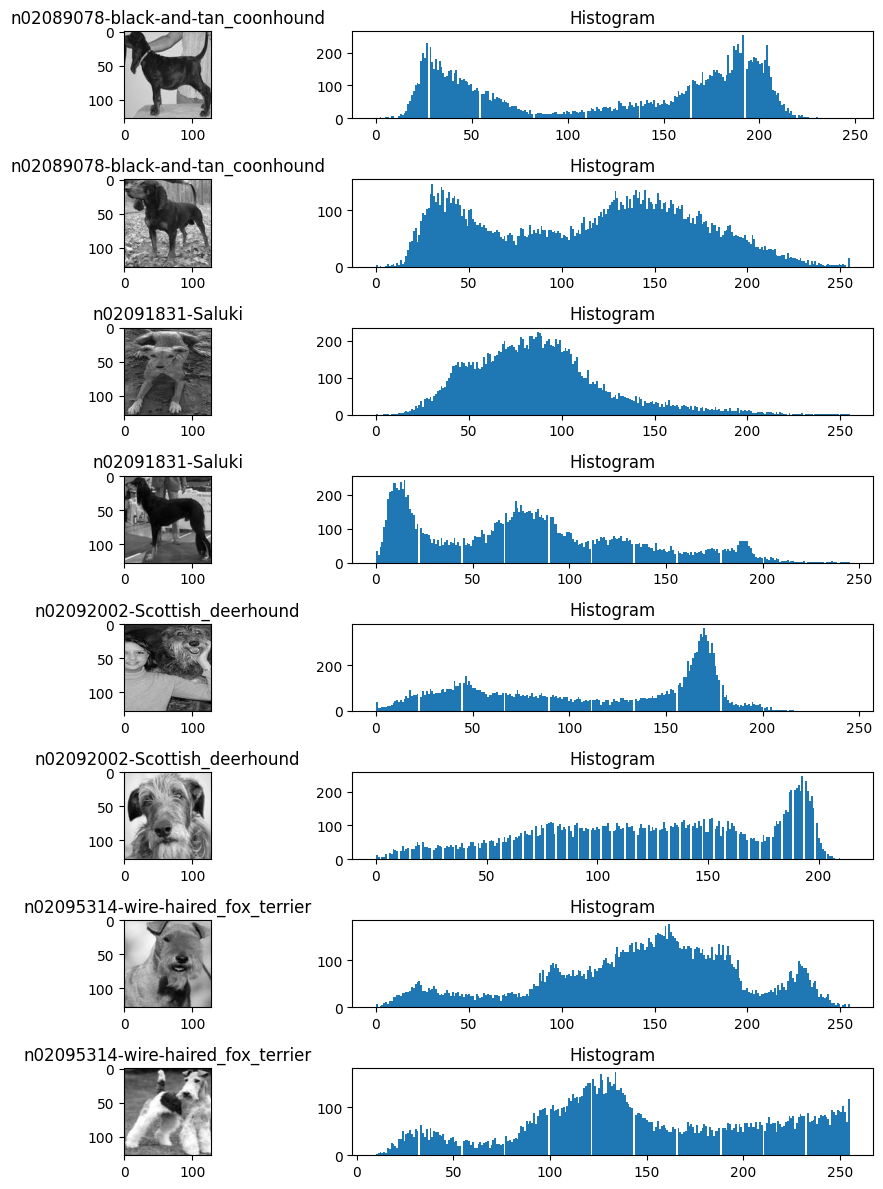

In [26]:
def Histogram_Equalization(image, x, title):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    ax[x, 0].imshow(img, cmap='gray')
    ax[x, 0].set_title(title)
    ax[x, 1].hist(img.flatten(), bins=256)
    ax[x, 1].set_title('Histogram')

# Define the list of dog breeds
dogs = ['n02089078-black-and-tan_coonhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02095314-wire-haired_fox_terrier']

# Create subplots for visualization
fig, ax = plt.subplots(8, 2, figsize=(10, 12))

# Initialize index and title
ind = 0
title = dogs[ind]

# Loop through the selected images
for x, i in enumerate(images):

    # Update title for every two images
    if x != 7:
        if x % 2 == 0 and x != 0:
            title = dogs[ind + 1]
            ind += 1

    # Call the Histogram_Equalization function
    Histogram_Equalization(i, x, title)

plt.tight_layout()
plt.show()


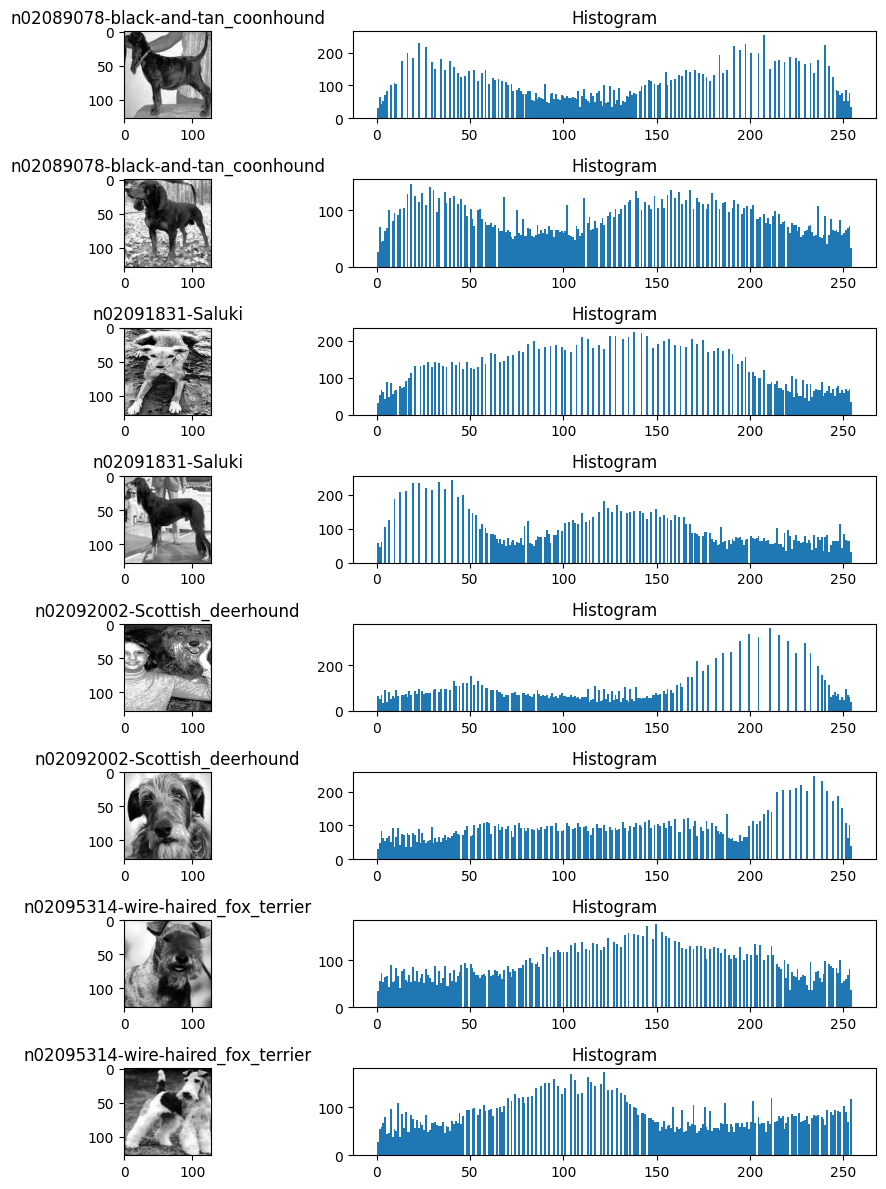

In [27]:
def Intensity_Equalization(image, x, title):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    equ = cv2.equalizeHist(img)
    ax[x, 0].imshow(equ, cmap='gray')
    ax[x, 0].set_title(title)
    ax[x, 1].hist(equ.flatten(), bins=256)
    ax[x, 1].set_title('Histogram')

# Define the list of dog breeds
dogs = ['n02089078-black-and-tan_coonhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02095314-wire-haired_fox_terrier']

# Create subplots for visualization
fig, ax = plt.subplots(8, 2, figsize=(10, 12))

# Initialize index and title
ind = 0
title = dogs[ind]

# Loop through the selected images
for x, i in enumerate(images):

    # Update title for every two images
    if x != 7:
        if x % 2 == 0 and x != 0:
            title = dogs[ind + 1]
            ind += 1

    # Call the Intensity_Equalization function
    Intensity_Equalization(i, x, title)

plt.tight_layout()
plt.show()


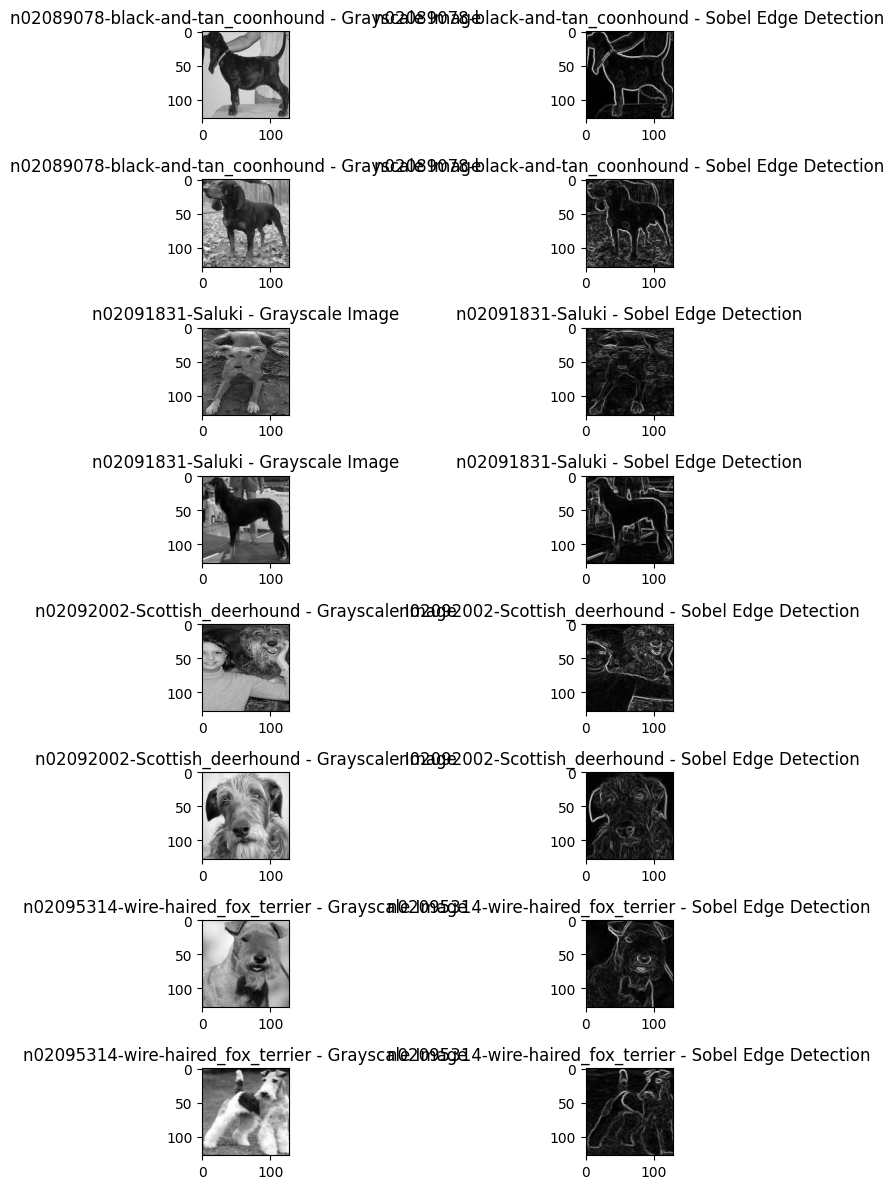

In [28]:
import cv2
import matplotlib.pyplot as plt
from skimage import filters

# Function to perform edge detection using Sobel filter
def Sobel_Edge_Detection(image, x, title):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

    # Apply Sobel filter for edge detection
    edges = filters.sobel(img)

    ax[x, 0].imshow(img, cmap='gray')
    ax[x, 0].set_title(title + ' - Grayscale Image')

    ax[x, 1].imshow(edges, cmap='gray')
    ax[x, 1].set_title(title + ' - Sobel Edge Detection')

# Define the list of dog breeds
dogs = ['n02089078-black-and-tan_coonhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02095314-wire-haired_fox_terrier']

# Initialize index and title
ind = 0
title = dogs[ind]

fig, ax = plt.subplots(8, 2, figsize=(10, 12))

# Loop through the selected images
for x, i in enumerate(images):
    # Update title for every two images
    if x != 7:
        if x % 2 == 0 and x != 0:
            title = dogs[ind + 1]
            ind += 1
    # Call the Sobel_Edge_Detection function
    Sobel_Edge_Detection(i, x, title)

plt.tight_layout()
plt.show()


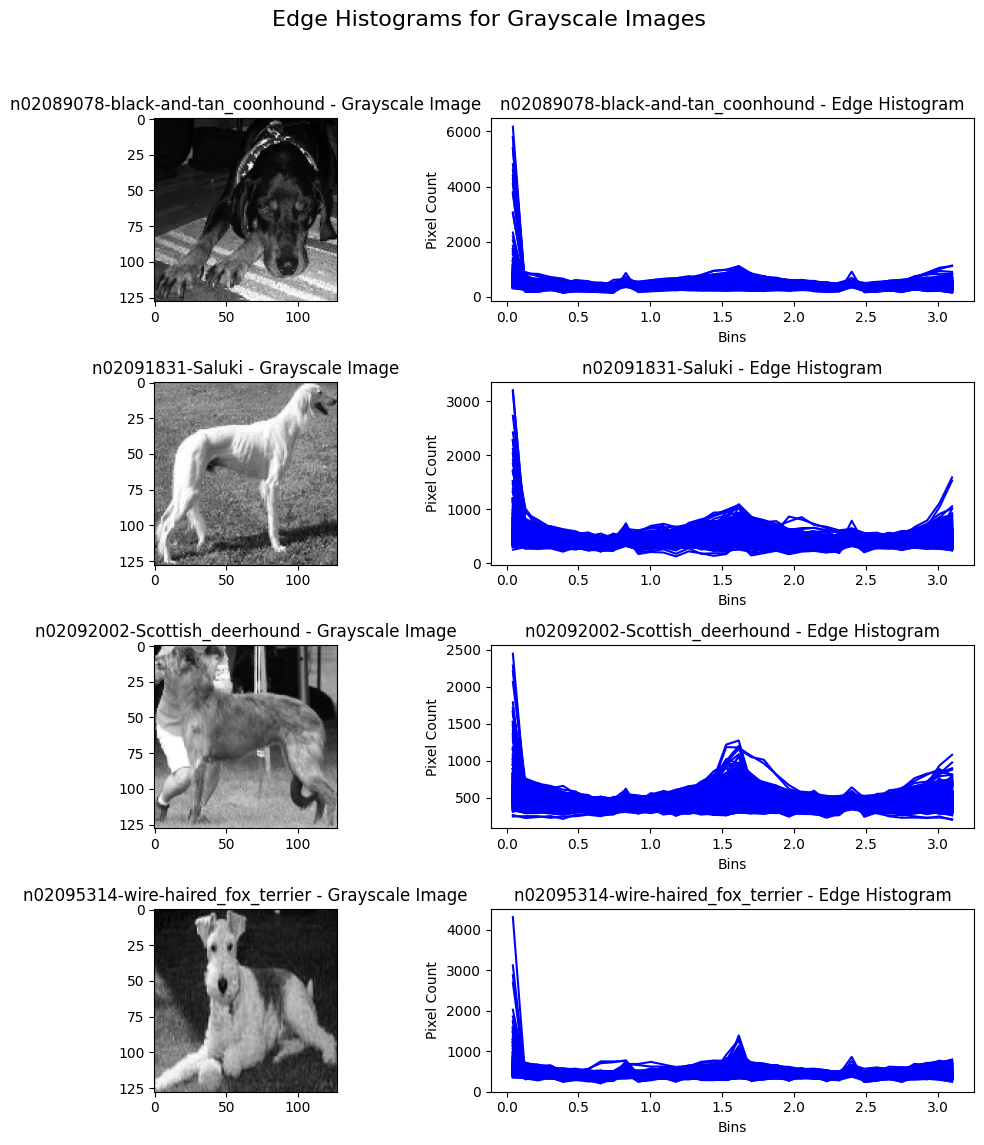

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, exposure
import os

# Function to process each selected image
def process_image(image_path, cls):
    # Load color image
    color_img = cv2.imread(image_path)

    # Convert to grayscale
    gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)

    # Calculate edge angles using Sobel operators
    angle_sobel = np.mod(np.arctan2(filters.sobel_v(gray_img), filters.sobel_h(gray_img)), np.pi)

    # Obtain histogram with 36 bins
    hist, bin_edges = exposure.histogram(angle_sobel.flatten(), nbins=36)

    return gray_img, angle_sobel, hist, bin_edges, cls

# Define the path to the main folder containing class folders
main_folder = '/content/drive/MyDrive/ResizedImages/'

# List of class folders (assuming each folder represents a different class)
image_classes = ['n02089078-black-and-tan_coonhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02095314-wire-haired_fox_terrier']

# Plot the images with their corresponding edge histogram values
fig, axes = plt.subplots(len(image_classes), 2, figsize=(10, 12))
fig.suptitle('Edge Histograms for Grayscale Images', fontsize=16)

for idx, cls in enumerate(image_classes):
    class_directory = os.path.join(main_folder, cls)

    # Iterate over files in the class directory
    for filename in os.listdir(class_directory):
        # Check if the file has a valid image extension (you can customize this based on your image formats)
        if filename.lower().endswith(('.jpg')):
            image_path = os.path.join(class_directory, filename)

            try:
                gray_img, angle_sobel, hist, bin_edges, selected_cls = process_image(image_path, cls)

                # Plot grayscale image
                axes[idx, 0].imshow(gray_img, cmap='gray')
                axes[idx, 0].set_title(f'{selected_cls} - Grayscale Image')

                # Plot edge histogram
                axes[idx, 1].plot(bin_edges, hist, color='blue')
                axes[idx, 1].set_title(f'{selected_cls} - Edge Histogram')
                axes[idx, 1].set_xlabel('Bins')
                axes[idx, 1].set_ylabel('Pixel Count')

            except Exception as e:
                print(f"Error processing image {filename}: {str(e)}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [30]:
import cv2
import numpy as np
from skimage import filters, exposure
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_distances

# Function to compute edge histogram
def compute_edge_histogram(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    angle_sobel = np.mod(np.arctan2(filters.sobel_v(gray_img), filters.sobel_h(gray_img)), np.pi)
    hist, _ = exposure.histogram(angle_sobel.flatten(), nbins=36)
    return hist

# Function to compare histograms using different distance metrics
def compare_histograms(hist1, hist2):
    euclidean_dist = euclidean_distances(hist1.reshape(1, -1), hist2.reshape(1, -1))
    manhattan_dist = manhattan_distances(hist1.reshape(1, -1), hist2.reshape(1, -1))
    cosine_dist = cosine_distances(hist1.reshape(1, -1), hist2.reshape(1, -1))
    return euclidean_dist, manhattan_dist, cosine_dist

# Load the images
img1 = cv2.imread('/content/drive/MyDrive/ResizedImages/n02089078-black-and-tan_coonhound/n02089078_1026-0.jpg')
img2 = cv2.imread('/content/drive/MyDrive/ResizedImages/n02089078-black-and-tan_coonhound/n02089078_1174-0.jpg')
img3 = cv2.imread('/content/drive/MyDrive/ResizedImages/n02091831-Saluki/n02091831_10576-0.jpg')

if img1 is None or img2 is None or img3 is None:
    print("Error: One or more images could not be read.")

# Compute edge histograms for the images
hist_img1 = compute_edge_histogram(img1)
hist_img2 = compute_edge_histogram(img2)
hist_img3 = compute_edge_histogram(img3)

# Compare histograms using different distance metrics
euclidean_dist_same_class, manhattan_dist_same_class, cosine_dist_same_class = compare_histograms(hist_img1, hist_img2)
euclidean_dist_diff_class, manhattan_dist_diff_class, cosine_dist_diff_class = compare_histograms(hist_img1, hist_img3)

# Display the computed distances
print("Euclidean Distance (Same Class):", euclidean_dist_same_class)
print("Manhattan Distance (Same Class):", manhattan_dist_same_class)
print("Cosine Distance (Same Class):", cosine_dist_same_class)

print("\nEuclidean Distance (Different Class):", euclidean_dist_diff_class)
print("Manhattan Distance (Different Class):", manhattan_dist_diff_class)
print("Cosine Distance (Different Class):", cosine_dist_diff_class)


Euclidean Distance (Same Class): [[645.2115932]]
Manhattan Distance (Same Class): [[2966.]]
Cosine Distance (Same Class): [[0.02607859]]

Euclidean Distance (Different Class): [[911.3802719]]
Manhattan Distance (Different Class): [[4434.]]
Cosine Distance (Different Class): [[0.05181831]]


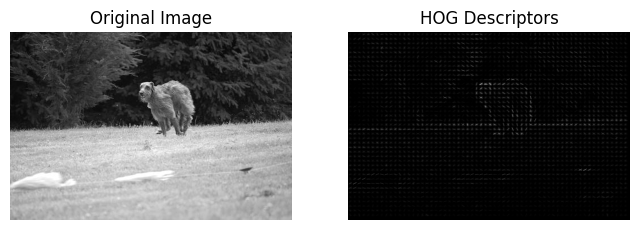

In [31]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog

# Function to compute HOG descriptors and visualize HOG image
def compute_and_visualize_hog(image):
    # Compute HOG descriptors
    hog_features, hog_image = hog(image, visualize=True)

    # Visualize the original image
    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Visualize the HOG descriptors
    plt.subplot(122)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Descriptors')
    plt.axis('off')

    plt.show()

# Load the image
image_path = '/content/drive/MyDrive/MyImages/n02092002-Scottish_deerhound/n02092002_1029.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image could not be read.")
else:
    compute_and_visualize_hog(image)


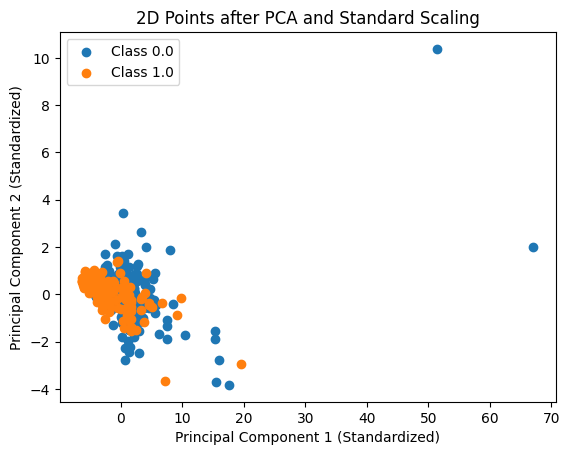

In [34]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, exposure
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def compute_edge_histogram(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    angle_sobel = np.mod(np.arctan2(filters.sobel_v(gray_img), filters.sobel_h(gray_img)), np.pi)
    hist, _ = exposure.histogram(angle_sobel.flatten(), nbins=36)
    return hist

def process_images_in_folder(folder_path):
    histograms = []

    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)

        # Check if the file has a valid image extension
        if image_path.lower().endswith(('.jpg', '.jpeg', '.png')):
            img = cv2.imread(image_path)
            hist = compute_edge_histogram(img)
            histograms.append(hist)

    return histograms

def plot_2d_points(reduced_data, labels):
    unique_labels = np.unique(labels)

    for label in unique_labels:
        indices = labels == label
        plt.scatter(reduced_data[indices, 0], reduced_data[indices, 1], label=f'Class {label}')

    plt.title('2D Points after PCA and Standard Scaling')
    plt.xlabel('Principal Component 1 (Standardized)')
    plt.ylabel('Principal Component 2 (Standardized)')
    plt.legend()
    plt.show()

# Folder paths for images from two classes
class1_folder_path = '/content/drive/MyDrive/MyImages/n02092002-Scottish_deerhound/'
class2_folder_path = '/content/drive/MyDrive/MyImages/n02095314-wire-haired_fox_terrier/'

# Process images and compute edge histograms for each class
class1_histograms = process_images_in_folder(class1_folder_path)
class2_histograms = process_images_in_folder(class2_folder_path)

# Combine histograms from both classes
all_histograms = np.vstack([class1_histograms, class2_histograms])

# Generate labels for each histogram (0 for class 1, 1 for class 2)
labels = np.zeros(len(class1_histograms) + len(class2_histograms))
labels[len(class1_histograms):] = 1

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)

# Use StandardScaler to normalize the data before applying PCA
scaler = StandardScaler()
normalized_data = scaler.fit_transform(all_histograms)
reduced_data = pca.fit_transform(normalized_data)

# Plot the 2D points with different colors for each class
plot_2d_points(reduced_data, labels)


In [40]:
#PCA
dogs_pca={0:'Scottish Deerhound',1:'Wire Haired Fox Terrier'}

In [48]:
# Correct the keys in dogs_pca to match the folder names exactly
dogs_pca = {0: 'n02092002-Scottish_deerhound', 1: 'n02095314-wire-haired_fox_terrier'}


In [67]:
def images_select_pca():
    images_hist = []
    for image_path in dog_images_cropped:
        folder_name = str(image_path).split('/')[-2]  # Extract the folder name
        for value in dogs_pca.values():
            if value.lower().replace(" ", "_") in folder_name.lower():
                images_hist.append(image_path)
                break  # Stop searching once a match is found
    return images_hist

images_pca = images_select_pca()
print(images_pca)



['/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound/n02092002_10911-0.jpg', '/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound/n02092002_11088-0.jpg', '/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound/n02092002_1029-0.jpg', '/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound/n02092002_109-0.jpg', '/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound/n02092002_1130-0.jpg', '/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound/n02092002_10693-0.jpg', '/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound/n02092002_11390-0.jpg', '/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound/n02092002_1147-0.jpg', '/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound/n02092002_11131-0.jpg', '/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound/n02092002_11428-0.jpg', '/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound/n02092002_1086-1.jpg', '/co

In [68]:
images_pca[0]

'/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound/n02092002_10911-0.jpg'

In [69]:
def pca():
    histo=[]
    for i in images_pca:
        img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
        hist = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()
        histo.append(hist)
        scaler = StandardScaler()
        histog = scaler.fit_transform(histo)
    pca = PCA(n_components=2)
    histgr = pca.fit_transform(histog)
    return histgr


pca_hist=pca()

pca_hist

array([[ 5.18675636e+00,  3.83370304e+00],
       [ 6.59521442e+00, -8.35608367e-01],
       [ 5.63333695e-01,  3.69093159e+00],
       [-1.72229586e+01, -2.50829914e+00],
       [ 6.38345549e+00,  4.17745761e+00],
       [ 1.58871296e+00,  3.01624419e+00],
       [-2.97342694e+00,  6.21145154e+00],
       [-4.03900734e+00, -5.41897736e+00],
       [ 7.25189177e+00, -3.83196027e+00],
       [ 2.88959143e+00,  6.12349848e+00],
       [-1.72904951e+01,  3.03547750e+00],
       [-1.67428374e+01, -8.20549096e+00],
       [-8.56641650e+00, -2.78305694e+00],
       [ 4.73458027e-01, -2.13987537e+00],
       [-2.47991972e+00, -4.66370997e+00],
       [ 8.91020088e-01,  1.63358256e+00],
       [ 6.79270488e+00,  1.06082153e+01],
       [ 3.20142360e+00, -3.20211843e+00],
       [-6.55381520e+00, -1.19217763e+00],
       [ 5.17426783e+00, -9.02085747e-01],
       [-1.47465952e+00,  1.36779906e+01],
       [ 1.11937479e+01,  3.69849050e-02],
       [ 1.20912971e+00,  5.71294211e+00],
       [ 4.

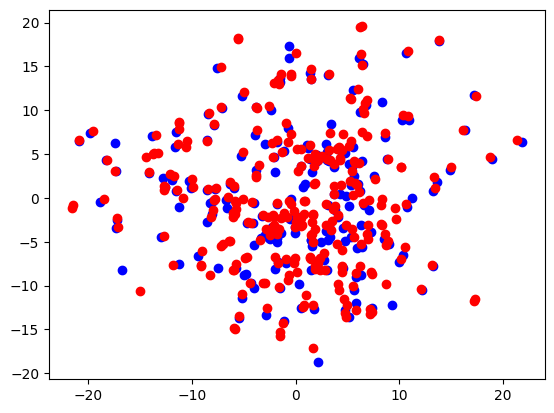

In [70]:
plt.scatter(pca_hist[:190,0],pca_hist[:190,1],color='blue')
plt.scatter(pca_hist[190:,0],pca_hist[190:,1],color='red')
plt.show()